# Setion 0: Data Exploratory

## Contents

- <a href='#importModule'>1. Import Module and Getting Data</a>
- <a href='#Explore'>2. Explore Dataset</a>
- <a href='#Visualized'>3. Visualized the Data</a>
- <a href='#HOG'>4. HOG Testing</a>

## 1. Import Module and Getting Data <a id='importModule'></a> 

In [2]:
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
import numpy as np

In [4]:
cwd = os.getcwd()
script_path = cwd + '/'
data_path = script_path + 'Data2'
train_path = data_path +'/' + 'mnist_background_random_train.amat'
test_path = data_path +'/' + 'mnist_background_random_test.amat'

In [75]:
df_train = np.loadtxt(train_path)
df_test = np.loadtxt(test_path)

X_train = df_train[:,0:-1]
y_train = df_train[:,-1]
X_test = df_test[:,0:-1]
y_test = df_test[:,-1]

In [76]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

Define Helper Function to visualised the image

In [34]:
# From the INM427 Inclass Exercise
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img,cmap ='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

## 2 Explore Dataset  <a id='Explore'></a> 

In [13]:
#Check Number
print('Number of training set',len(df_train))
print('Number of testing set',len(df_test))
# Check Null
print('\nCheck Null')
print('Null check in trainset',sum(sum(np.isnan(df_train))))
print('Null check in testset',sum(sum(np.isnan(df_test))))

#Check classes distribution
unique_test, counts_test = np.unique(y_test , return_counts=True)
unique_train, counts_train = np.unique(y_train , return_counts=True)
counts_test = counts_test/len(y_test) *100
counts_train = counts_train/len(y_train) *100
print('\nClass distribution of training set')
print(dict(zip(unique_train, counts_train)))
print('Class distribution of Testing set')
print(dict(zip(unique_test, counts_test)))

#Check Data Type of
print('\nCheck Datatype')
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
print(X_train.dtype, y_train.dtype,X_test.dtype,y_test.dtype)

#Check Min Max
print('\nConfirm Minmax')
print(np.min(X_train), np.max(X_train))
print(np.min(X_test), np.max(X_test),'\n')

Number of training set 12000
Number of testing set 50000

Check Null
Null check in trainset 0
Null check in testset 0

Class distribution of training set
{0: 9.55, 1: 11.083333333333334, 2: 10.158333333333333, 3: 10.525, 4: 9.425, 5: 9.391666666666666, 6: 10.041666666666666, 7: 9.941666666666666, 8: 9.950000000000001, 9: 9.933333333333334}
Class distribution of Testing set
{0: 9.836, 1: 11.41, 2: 9.9, 3: 10.042, 4: 9.922, 5: 9.074, 6: 9.724, 7: 10.335999999999999, 8: 9.872, 9: 9.884}

Check Datatype
float64 int64 float64 int64

Confirm Minmax
3.0704383e-08 0.99999965
3.9210075e-09 1.0 



## 3 Visualized the Data <a id='Visualized'></a> 

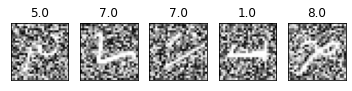

In [68]:
plot_example(X_train,y_train)

The plot images are in the wrong orientatation. Need to pre-process them to make it easier to understand

In [77]:
# Preprocess training set
#Rotate the image
for i in range(X_train.shape[0]):
    img_rotate = X_train[i,:,:]
    
    img_rotate = img_rotate.reshape(28,28)
    img_rotate = np.rot90(img_rotate,3)
    X_train[i,:,:] = img_rotate.reshape(1,28,28)
    
#Flip the image
for i in range(X_train.shape[0]):
    img_flip = X_train[i,:,:]
    
    img_flip = img_flip.reshape(28,28)
    img_flip = np.fliplr(img_flip)
    X_train[i,:,:] = img_flip.reshape(1,28,28)
    

# Preprocess testing set
#Rotate the image
for i in range(X_test.shape[0]):
    img_rotate = X_test[i,:,:]
    
    img_rotate = img_rotate.reshape(28,28)
    img_rotate = np.rot90(img_rotate,3)
    X_test[i,:,:] = img_rotate.reshape(1,28,28)
    
#Flip the image
for i in range(X_test.shape[0]):
    img_flip = X_test[i,:,:]
    
    img_flip = img_flip.reshape(28,28)
    img_flip = np.fliplr(img_flip)
    X_test[i,:,:] = img_flip.reshape(1,28,28)

Plot training and testing again

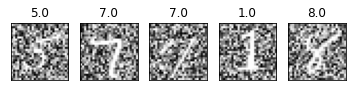

In [78]:
plot_example(X_train,y_train)

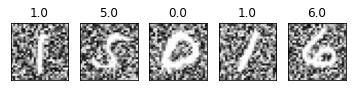

In [79]:
plot_example(X_test,y_test)

Visualised big image for documentation

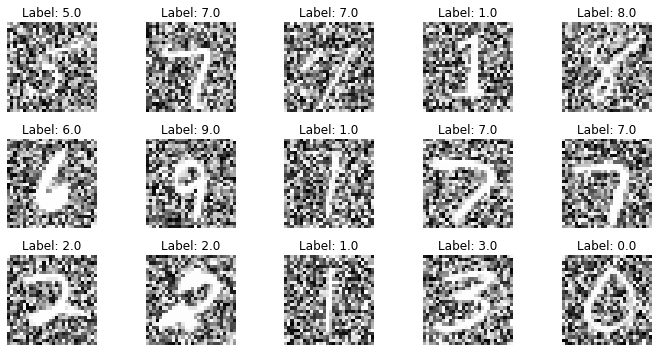

In [80]:
# Credit CV Code
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(15):
    ax[i].imshow(X_train[i, :, :], cmap='gray')
    ax[i].set_title(f'Label: {y_train[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

## 4 HOG Testing <a id='HOG'></a> 

In this section we will try to figure out HOG parameters that have us about the size of the plot.

In [118]:
img = X_train[3,:,:]

Choose pixels_per_cell=(2, 2) and cell_per_block since it gave us the finest detail of feature for image of this size

In [128]:
HOG_des, HOG_image = hog(img, orientations=8, pixels_per_cell=(2, 2),
                    cells_per_block=(2, 2), visualize=True)

In [129]:
HOG_des.shape

(5408,)

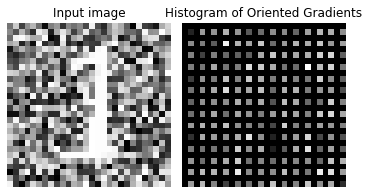

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5), sharex=True, sharey=True)

ax[0].axis('off')
ax[0].imshow(img,cmap ='gray')
ax[0].set_title('Input image')

# Rescale histogram for better display
HOG_image_rescaled = exposure.rescale_intensity(HOG_image, in_range=(0, 10))

ax[1].axis('off')
ax[1].imshow(HOG_image_rescaled, cmap='gray')
ax[1].set_title('Histogram of Oriented Gradients')
fig.tight_layout()
plt.show()

Even though it is hard for human to identify number 1 from the HOG, we are working under the assumption that the same image should have similar HOG feauture. 
Hence, the alorithm should still work better than just the raw input